# Oscilador armónico con forzamientos periódico

Basado en un notebook del profesor Victor Breña y actualizado para el proyecto final de la materia de sistemas dinámicos 2.

En este ejemplo caracterizamos el oscilador armónico forzado
como el que se supone entró en resonancia para destruir el puente de Tacoma,
aunque sabemos que esa explicación es incorrecta, en las gráficas se puede apreciar la resonancia:

In [1]:
#Se llaman los paquetes necesarios para resolver las ecuaciones y graficarlas.



using DifferentialEquations
using Plots
using LaTeXStrings

┌ Info: Recompiling stale cache file /Users/jeroaranda/.julia/compiled/v1.0/DifferentialEquations/UQdwS.ji for DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
└ @ Base loading.jl:1190
┌ Warning: The call to compilecache failed to create a usable precompiled cache file for DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
│   exception = ErrorException("Required dependency BlackBoxOptim [a134a8b2-14d6-55f6-9291-3336d3ab0209] failed to load from a cache file.")
└ @ Base loading.jl:969


In [3]:
# Definimos nuestro sistema de tal forma que se usa x''+ax'+bx+Fcos(w*t), 
#con los valores de las constantes como se explica en el documento
#De tal forma que el sistema se encuentre en resonancia.
#Si se habilita el último comentario en esta sección ejemplificamos un sistema que no solamente tiene
#forzamientos periódicos si no que además estos aumentan linealmente con el tiempo. Esto podría representar el aumento
#de la fuerza del viento, nos resulta extraño que esta se modele como un forzamiento periódico sin que tenga un 
#factor lineal.
#Un sistema con estas características seguramente se destruirá pues la fuerza tiende a infinito.
#En algún momento esta superaría la capacidad del sistema y este sería destruído.
function CoupPend(du,u,p,t)
    du[1] = u[2]
    #du[2] = u[4]
    du[2] = p[1]/p[2]*cos(sqrt(p[4]/p[2])*t) - p[3]/p[2]*(u[2]) -p[4]/p[2]*u[1]
       # du[2] = p[1]/p[2]*t*cos(sqrt(p[4]/p[2])*t) - p[3]/p[2]*(u[2]) -p[4]/p[2]*u[1]


end

CoupPend (generic function with 1 method)

In [16]:
# Definimos condiciones iniciales
u0    = [0,0.0]
# Definimos el tiempo en el que queremos resolver nuestro sistema.
tspan = (0.0,1000.0)
# Definimos nuestros parámetros de tal forma que el sistema forzado se encuentre en resonancia.
p     = [1000,10,1,.2]
# Definimos nuestro problema de ecuaciones diferenciales.
prob  = ODEProblem(CoupPend,u0,tspan,p)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 1000.0)
u0: [0.0, 0.0]

In [17]:
# Corremos las soluciones a partir de nuestro solver.
sol    = solve(prob)

retcode: Success
Interpolation: 3rd order Hermite
t: 190-element Array{Float64,1}:
    0.0                  
    9.999999999999999e-5 
    0.0010999999999999998
    0.011099999999999997 
    0.08450329415705146  
    0.315208488265434    
    0.7843767366751183   
    1.5303857916954904   
    2.5567141475566277   
    3.946391785153277    
    5.732392799780126    
    7.958852170327924    
   10.600896000672506    
    ⋮                    
  938.3325162389788      
  943.8806080100011      
  949.5863394286887      
  955.4455013544642      
  961.2180917939243      
  966.9096602557057      
  972.4999887771792      
  978.5637259496466      
  984.1452416704175      
  989.9711119923917      
  995.42352563692        
 1000.0                  
u: 190-element Array{Array{Float64,1},1}:
 [0.0, 0.0]              
 [4.99998e-7, 0.00999995]
 [6.04978e-5, 0.109994]  
 [0.00615822, 1.10938]   
 [0.356028, 8.41432]     
 [4.9144, 31.0086]       
 [29.912, 75.1282]       
 [110.48, 139.654

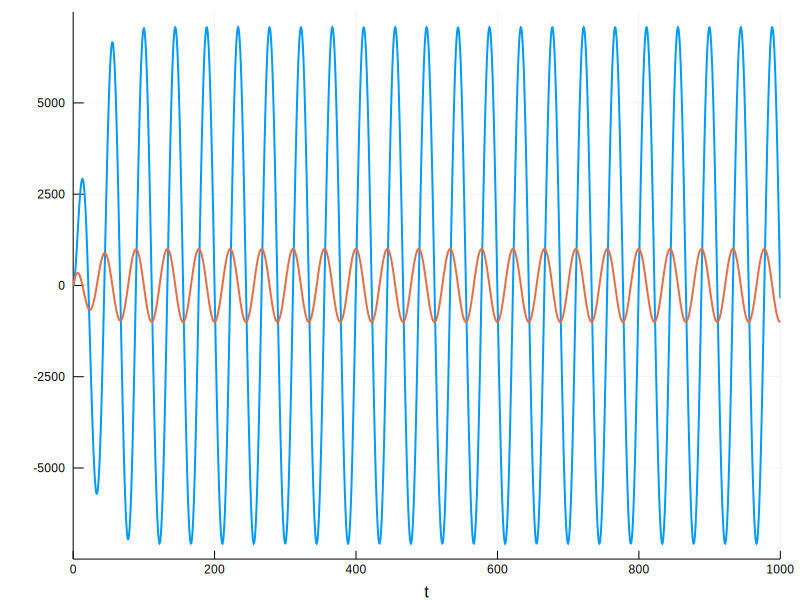

sh: latex: command not found
latex: failed to create a dvi file
sh: latex: command not found
latex: failed to create a dvi file
sh: latex: command not found
latex: failed to create a dvi file


In [20]:
# Graficamos para x y x' con respecto al tiempo
plot(sol,vars=(0,1),xlabel=L"t",ylabel=L"\theta",label=L"\theta_1",lw=2,layout=(1,1),size = (800, 600))
plot!(sol,vars=(0,2),label=L"\theta_2",lw=2)
# Save figure
#png("argdis.png")

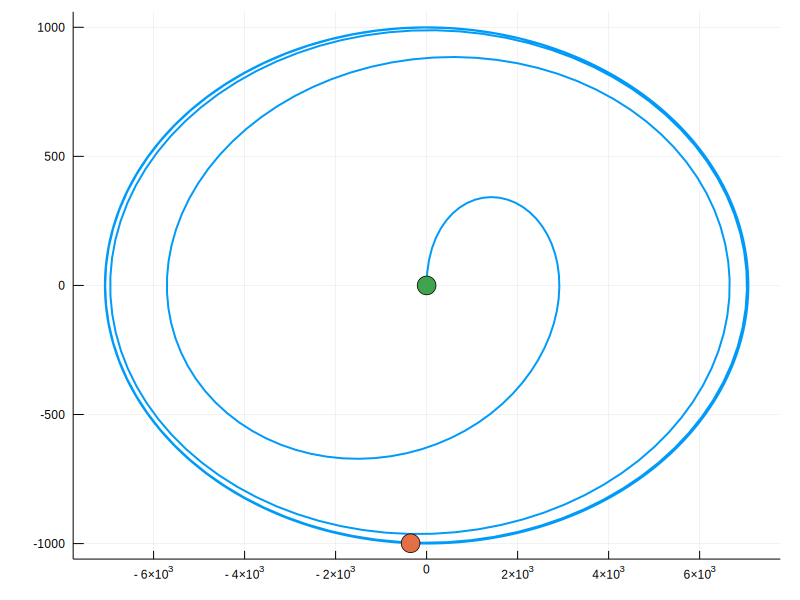

sh: latex: command not found
latex: failed to create a dvi file
sh: latex: command not found
latex: failed to create a dvi file


In [21]:
# En este ejemplo vemos el diagrama de x respecto a x'.
plot(sol,vars=(1,2),xlabemel=L"\theta_1", ylabel=L"\theta_2",lw=2,label="",layout=(1,1),size = (800, 600))
plot!(sol[1:1,1:1],sol[2:2,1:1],m=:circle,ms=10,label="",subplot=1,c=[3])
plot!(sol[1:1,end:end],sol[2:2,end:end],m=:circle,ms=10,label="",subplot=1,c=[2])
#
#plot!(sol,vars=(1,2),lw=2,xlabel=L"\varphi_1", ylabel=L"\varphi_2",label="",subplot=2)

#plot!(sol[2:2,1:1],sol[1:1,1:1],m=:circle,ms=10,label="",subplot=2,c=[3])
#plot!(sol[2:2,end:end],sol[1:1,end:end],m=:circle,ms=10,label="",subplot=2,c=[2])
#
#plot!(sol,vars=(1,2),lw=2,xlabel=L"\theta_1", ylabel=L"\varphi_1",label="",subplot=3)
#plot!(sol[1:1,1:1],sol[2:2,1:1],m=:circle,ms=10,label="",subplot=3,c=[3])
#plot!(sol[1:1,end:end],sol[2:2,end:end],m=:circle,ms=10,label="",subplot=3,c=[2])
#
#plot!(sol,vars=(2,4),lw=2,xlabel=L"\theta_2", ylabel=L"\varphi_2",label="",subplot=4)
#plot!(sol[2:2,1:1],sol[4:4,1:1],m=:circle,ms=10,label="",subplot=4,c=[3])
#plot!(sol[2:2,end:end],sol[4:4,end:end],m=:circle,ms=10,label="",subplot=4,c=[2])
# Save figure
#png("phaseproj.png")